Name: Hamdi Erkut

I hereby declare that I observed the honour code of the university when preparing the homework.

## Solution to 16.3-5 and 18

C:\Users\hamdi\AppData\Local\Programs\Python\Python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\hamdi\AppData\Local\Programs\Python\Python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\hamdi\AppData\Local\Programs\Python\Python36-32\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\hamdi\AppData\Local\Programs\Python\Python36-32\lib\site-packages\matplotlib\rcsetup.p

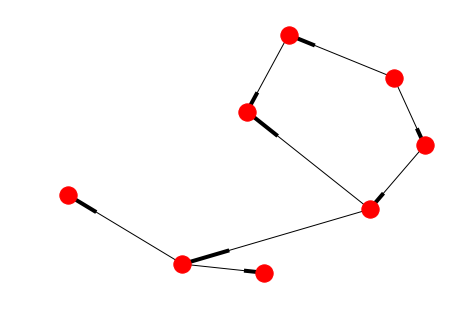

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_nodes_from(range(1,9))
G.add_edges_from([(1,2),(1,3),(2,4),(3,6),(4,5),(4,6),(5,7),(5,8)])
nx.draw(G)
plt.show()

## Programming Homework 3

In this exercise we model a string of text using a Markov(1) model. For simplicity we only consider letters 'a-z'. Capital letters 'A-Z' are mapped to the corresponding ones. All remaining letters, symbols, numbers, including spaces, are denoted by '.'.


We have a probability table $T$ where $T_{i,j} = p(x_t = j | x_{t-1} = i)$  transition model of letters in English text for $t=1,2 \dots N$. Assume that the initial letter in a string is always a space denoted as $x_0 = \text{'.'}$. Such a model where the probability table is always the same is sometimes called a stationary model.

1. For a given $N$, write a program to sample random strings with letters $x_1, x_2, \dots, x_N$ from $p(x_{1:N}|x_0)$
1. Now suppose you are given strings with missing letters, where each missing letter is denoted by a question mark (or underscore, as below). Implement a method, that samples missing letters conditioned on observed ones, i.e., samples from $p(x_{-\alpha}|x_{\alpha})$ where $\alpha$ denotes indices of observed letters. For example, if the input is 't??.', we have $N=4$ and
$x_1 = \text{'t'}$ and $x_4 = \text{'.'}$, $\alpha=\{1,4\}$ and $-\alpha=\{2,3\}$. Your program may possibly generate the strings 'the.', 'twi.', 'tee.', etc. Hint: make sure to make use all data given and sample from the correct distribution. Implement the method and print the results for the test strings below. 
1. Describe a method for filling in the gaps by estimating the most likely letter for each position. Hint: you need to compute
$$
x_{-\alpha}^* = \arg\max_{x_{-\alpha}} p(x_{-\alpha}|x_{\alpha})
$$
Implement the method and print the results for the following test strings along with the log-probability  $\log p(x_{-\alpha}^*,x_{\alpha})$.
1. Discuss how you can improve the model to get better estimations.

In [1]:
test_strings = ['th__br__n.f_x.', '_u_st__n_.to_be._nsw_r__','i__at_._a_h_n_._e_r_i_g','q___t.___z._____t.__.___.__.']

Hint: The code below loads a table of transition probabilities for English text.

In [2]:
import csv
from IPython.display import display, Latex

alphabet = [chr(i+ord('a')) for i in range(26)]
alphabet.append('.')
letter2idx = {c:i for i,c in enumerate(alphabet)}

T = []
with open('transitions.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        T.append(row)

print('Example')
## p(x_t = 'u' | x_{t-1} = 'q')
display(Latex(r"$p(x_t = \text{'u'} | x_{t-1} = \text{'q'})$"))
print(T[letter2idx['q']][letter2idx['u']])
display(Latex(r"$p(x_t | x_{t-1} = \text{'a'})$"))
for c,p in zip(alphabet,T[letter2idx['a']]):
    print(c,p)
    


Example


<IPython.core.display.Latex object>

0.9949749


<IPython.core.display.Latex object>

a 0.0002835
b 0.0228302
c 0.0369041
d 0.0426290
e 0.0012216
f 0.0075739
g 0.0171385
h 0.0014659
i 0.0372661
j 0.0002353
k 0.0110124
l 0.0778259
m 0.0260757
n 0.2145354
o 0.0005459
p 0.0195213
q 0.0001749
r 0.1104770
s 0.0934290
t 0.1317960
u 0.0098029
v 0.0306574
w 0.0088799
x 0.0009562
y 0.0233701
z 0.0018701
. 0.0715219
